In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import show
import scipy as sp
import glob
import os

In [2]:
path = './SAFeedback1617/2016/'
files = glob.glob(os.path.join(path,'A*.csv'))
df_ea = (pd.read_csv(f).assign(Location = os.path.basename(f).split(' ')[-1].split('.')[0]
                              , Week = os.path.basename(f).split(' ')[2]
                              , Year = 2016) for f in files)
conc_df1 = pd.concat(df_ea, ignore_index=True, sort=True)

In [3]:
conc_df1.head()

,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Location,Timestamp,Unnamed: 0,Week,What track are you in?,Year
0,NaN,3,3,Taipei,8/5/2016 1:39:41,NaN,7,NaN,2016
1,NaN,3,4,Taipei,8/5/2016 1:40:47,NaN,7,NaN,2016
2,NaN,3,4,Taipei,8/5/2016 1:40:50,NaN,7,NaN,2016
3,NaN,4,4,Taipei,8/5/2016 1:42:44,NaN,7,NaN,2016
4,NaN,4,5,Taipei,8/5/2016 1:45:13,NaN,7,NaN,2016


In [4]:
conc_df1 = conc_df1.replace('#REF!', np.nan)
conc_df1 = conc_df1.dropna(subset=['How would you rate your overall satisfaction with the Summer Academy this week?'])

In [5]:
conc_df1 = conc_df1.assign(Pacing = conc_df1['How well are the tutorials paced?'].fillna(conc_df1['How well is the schedule paced?']))
conc_df1 = conc_df1.assign(TimeStamp = conc_df1['Timestamp'].fillna(conc_df1['Unnamed: 0']))

In [6]:
conc_df1['Pacing'] = conc_df1['Pacing'].astype('int')
conc_df1['Pacing'] = conc_df1['Pacing'].astype('category')

In [7]:
conc_df1 = conc_df1.rename(index = str, columns = {"How would you rate your overall satisfaction with the Summer Academy this week?": "Rating", "What track are you in?": "Track"})

In [8]:
conc_df1['Rating'] = conc_df1['Rating'].astype('int')

In [9]:
conc_df1['Rating'] = conc_df1['Rating']*2

In [10]:
conc_df1 = conc_df1.drop(['How well are the tutorials paced?', 'How well is the schedule paced?','Timestamp','Unnamed: 0','TimeStamp'], axis = 1)

In [11]:
conc_df1['Pacing'].unique()

[3, 4, 1, 2, 5]
Categories (5, int64): [3, 4, 1, 2, 5]

In [12]:
unique, count = np.unique(conc_df1['Pacing'], return_counts=True)
print(unique, count)

[1 2 3 4 5] [  6  59 571 247  43]


In [13]:
conc_df1['Pacing'] = conc_df1['Pacing'].cat.rename_categories(['Way too slow', 'A little too slow',
                                                              'Just right', 'A little too fast',
                                                              'Way too fast'])

In [14]:
unique, count = np.unique(conc_df1['Pacing'], return_counts=True)
print(unique, count)

['A little too fast' 'A little too slow' 'Just right' 'Way too fast'
 'Way too slow'] [247  59 571  43   6]


In [15]:
conc_df1['Week'] = conc_df1['Week'].astype('int')
conc_df1['Week'] = conc_df1['Week'].astype('category')

In [16]:
unique, count = np.unique(conc_df1['Week'], return_counts=True)
print(unique, count)

[1 2 3 4 5 6 7] [213 161  95 100 130 124 103]


In [17]:
conc_df1['Track'] = conc_df1['Track'].astype('category')

In [18]:
conc_df1.loc[conc_df1['Location'] == 'SG',['Location']] = 'Singapore'
conc_df1['Location'] = conc_df1['Location'].astype('category')
conc_df1['Location'].cat.categories

Index(['HK', 'LA', 'NY', 'SF', 'SV', 'Singapore', 'Taipei', 'Tokyo'], dtype='object')

In [19]:
np.unique(conc_df1['Location'].dropna(), return_counts=True)

(array(['HK', 'LA', 'NY', 'SF', 'SV', 'Singapore', 'Taipei', 'Tokyo'],
       dtype=object), array([  6,  59, 169, 295, 313,  48,  23,  13]))

In [20]:
locdict = {'HK': 'Hong Kong', 'LA': 'Los Angeles', 'NY': 'New York City', 'SF': 'San Francisco'
          , 'SV':'Sunnyvale', 'Singapore': 'Singapore', 'Taipei': 'Taipei', 'Tokyo': 'Tokyo'}

In [21]:
conc_df1['Location'].cat.categories

Index(['HK', 'LA', 'NY', 'SF', 'SV', 'Singapore', 'Taipei', 'Tokyo'], dtype='object')

In [22]:
conc_df1['Location'] = conc_df1['Location'].cat.rename_categories(locdict)

In [23]:
#conc_df1['Location'] = conc_df1['Location'].cat.rename_categories(['Hong Kong','Los Angeles', 'New York City', 'San Francisco', 'Sunnyvale', 'Singapore', 'Taipei', 'Tokyo'])

In [24]:
np.unique(conc_df1['Location'].dropna(), return_counts=True)

(array(['Hong Kong', 'Los Angeles', 'New York City', 'San Francisco',
        'Singapore', 'Sunnyvale', 'Taipei', 'Tokyo'], dtype=object),
 array([  6,  59, 169, 295,  48, 313,  23,  13]))

In [25]:
conc_df1.describe(include='all')

,Rating,Location,Week,Track,Year,Pacing
count,926.00000,926,926.0,808,926.0,926
unique,NaN,8,7.0,4,NaN,5
top,NaN,Sunnyvale,1.0,Apps,NaN,Just right
freq,NaN,313,213.0,395,NaN,571
mean,8.38013,NaN,NaN,NaN,2016.0,NaN
std,1.58445,NaN,NaN,NaN,0.0,NaN
min,2.00000,NaN,NaN,NaN,2016.0,NaN
25%,8.00000,NaN,NaN,NaN,2016.0,NaN
50%,8.00000,NaN,NaN,NaN,2016.0,NaN
75%,10.00000,NaN,NaN,NaN,2016.0,NaN


In [26]:
df2 = pd.read_csv('./SAFeedback1617/2016/Week 8 Feedback (2016, incomplete) - results.csv')
df2.head()

,#,How likely is it that you would recommend the Make School Summer Academy to a friend?,location,track,Start Date (UTC),Submit Date (UTC),Network ID
0,00b836bda84e6bdbe780af97e249e59f,10,New York,summerApps,9/7/16 1:03,9/7/16 1:04,3212b7a834
1,39dde6dc0e1e375845d756fc7e39fc5f,10,San Francisco,summerIntro,9/7/16 1:03,9/7/16 1:04,f4954355aa
2,5e56b9de91670b308cb98dd2848b8739,10,New York,summerIntro,9/7/16 1:03,9/7/16 1:05,3d69ca289b
3,641081d05785b47a0f17448625da0d49,9,Sunnyvale,summerApps (4-week),9/7/16 1:04,9/7/16 1:06,261608f95d
4,c29bdd4f5678d78b450f4494e0f53c8c,3,San Francisco,summerIntro,9/7/16 1:04,9/7/16 1:11,d6672ddf6f


In [27]:
df2 = df2.drop(['#','Start Date (UTC)','Submit Date (UTC)','Network ID'], axis = 1)

In [28]:
df2.loc[df2['location'] == 'New York',['location']] = 'New York City'
df2.loc[:,['track']] = df2['track'].apply(lambda x: x[6:])
df2 = df2.assign(Week = 8, Year = 2016)
df2 = df2.rename(index = str, columns = {"location":"Location", "track":"Track",
                                        "How likely is it that you would recommend the Make School Summer Academy to a friend?": "Rating"})

In [29]:
df2.head()

,Rating,Location,Track,Week,Year
0,10,New York City,Apps,8,2016
1,10,San Francisco,Intro,8,2016
2,10,New York City,Intro,8,2016
3,9,Sunnyvale,Apps (4-week),8,2016
4,3,San Francisco,Intro,8,2016


In [30]:
df2016 = pd.concat((conc_df1, df2), ignore_index=True, sort=True)
df2016.head()

,Location,Pacing,Rating,Track,Week,Year
0,Taipei,Just right,6,NaN,7,2016
1,Taipei,Just right,8,NaN,7,2016
2,Taipei,Just right,8,NaN,7,2016
3,Taipei,A little too fast,8,NaN,7,2016
4,Taipei,A little too fast,10,NaN,7,2016


In [31]:
df2016.dtypes

Location    object
Pacing      object
Rating       int64
Track       object
Week         int64
Year         int64
dtype: object

In [32]:
df2017 = pd.read_csv('./SAFeedback1617/2017/Student Feedback Surveys-Superview.csv')
df2017 = df2017.assign(Year = 2017)
print(df2017.shape)
df2017.head()

(1453, 7)


,ID,Location,Track,Week,Rating (Num),Schedule Pacing,Year
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,2017
1,36,Los Angeles,Apps,Week 1,4,A little too fast,2017
2,117,San Francisco,Games,Week 1,4,Way too slow,2017
3,253,NaN,NaN,Week 2,4,A little too fast,2017
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,2017


In [33]:
df2017['Rating (Num)'].unique()

array(['3', '4', '5', '6', '7', '8', '9', '10', '0', '1', '2', '#ERROR!'],
      dtype=object)

In [34]:
df2017 = df2017.replace('#ERROR!', np.nan)
df2017 = df2017.dropna(subset=['Rating (Num)'])
df2017 = df2017.drop(['ID'], axis = 1)

In [35]:
df2017 = df2017.rename(index = str, columns={'Rating (Num)': 'Rating', 'Schedule Pacing': 'Pacing'})

In [36]:
df2017.loc[:,['Week']] = df2017['Week'].apply(lambda x: x[-1]).astype('int')

In [37]:
df2017['Rating'] = df2017['Rating'].astype('int')

In [38]:
df2017.head()

,Location,Track,Week,Rating,Pacing,Year
0,San Francisco,"Apps, Explorer",1,3,Just right,2017
1,Los Angeles,Apps,1,4,A little too fast,2017
2,San Francisco,Games,1,4,Way too slow,2017
3,NaN,NaN,2,4,A little too fast,2017
4,New York City,"Apps, Explorer",1,4,Just right,2017


In [39]:
print(df2017.shape)
df2017.dtypes

(1450, 6)


Location    object
Track       object
Week         int64
Rating       int64
Pacing      object
Year         int64
dtype: object

In [40]:
df2017['Location'].count()

1406

In [41]:
df1617 = pd.concat((df2016, df2017), ignore_index=True, sort=True)

In [42]:
print(df1617.shape)
df1617.head()

(2441, 6)


,Location,Pacing,Rating,Track,Week,Year
0,Taipei,Just right,6,NaN,7,2016
1,Taipei,Just right,8,NaN,7,2016
2,Taipei,Just right,8,NaN,7,2016
3,Taipei,A little too fast,8,NaN,7,2016
4,Taipei,A little too fast,10,NaN,7,2016


In [43]:
df1617['Location'] = df1617['Location'].astype('category')
df1617['Pacing'] = df1617['Pacing'].astype('category')
df1617['Track'] = df1617['Track'].astype('category')
df1617['Year'] = df1617['Year'].astype('category')
df1617['Week'] = df1617['Week'].astype('category')

In [44]:
df1617.dtypes

Location    category
Pacing      category
Rating         int64
Track       category
Week        category
Year        category
dtype: object

In [45]:
df1617.describe(include='all')

,Location,Pacing,Rating,Track,Week,Year
count,2397,2376,2441.000000,2279,2441.0,2441.0
unique,15,5,NaN,8,8.0,2.0
top,San Francisco,Just right,NaN,Apps,1.0,2017.0
freq,684,1605,NaN,1293,501.0,1450.0
mean,NaN,NaN,8.408029,NaN,NaN,NaN
std,NaN,NaN,1.513817,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,8.000000,NaN,NaN,NaN
50%,NaN,NaN,8.000000,NaN,NaN,NaN
75%,NaN,NaN,10.000000,NaN,NaN,NaN


In [46]:
np.unique(df1617['Track'].dropna(), return_counts=True)

(array(['Apps', 'Apps (4-week)', 'Apps, Explorer', 'Games',
        'Games (4-week)', 'Games, Explorer', 'Intro', 'VR'], dtype=object),
 array([1293,    3,  224,  410,    2,   43,  211,   93]))

In [47]:
df1617.head(10)

,Location,Pacing,Rating,Track,Week,Year
0,Taipei,Just right,6,NaN,7,2016
1,Taipei,Just right,8,NaN,7,2016
2,Taipei,Just right,8,NaN,7,2016
3,Taipei,A little too fast,8,NaN,7,2016
4,Taipei,A little too fast,10,NaN,7,2016
5,Taipei,Just right,8,NaN,7,2016
6,Taipei,Just right,8,NaN,7,2016
7,Taipei,Just right,10,NaN,7,2016
8,Taipei,Just right,10,NaN,7,2016
9,Taipei,Just right,10,NaN,7,2016


/Users/fanggot/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


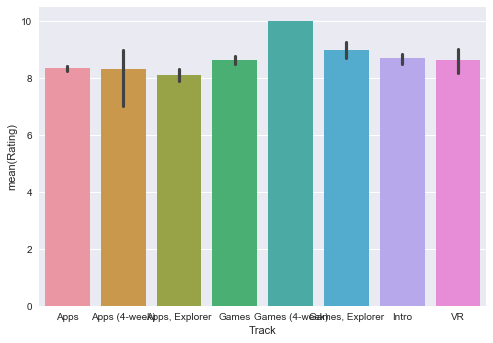

In [48]:
sns.barplot(x='Track', y='Rating', data=df1617)
show()

In [49]:
df1617['Week'] = df1617['Week'].cat.as_ordered()

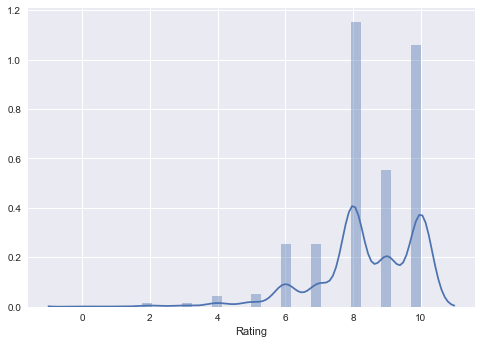

In [50]:
sns.distplot(df1617['Rating'])
show()

/Users/fanggot/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


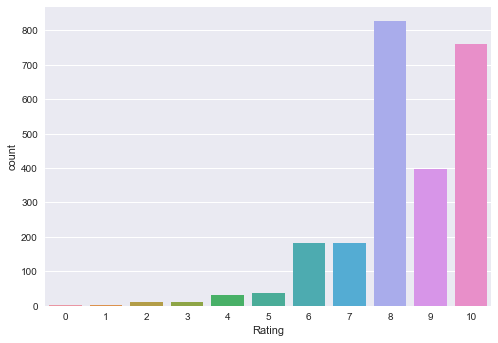

In [51]:
sns.countplot(x = "Rating", data = df1617)
show()

/Users/fanggot/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


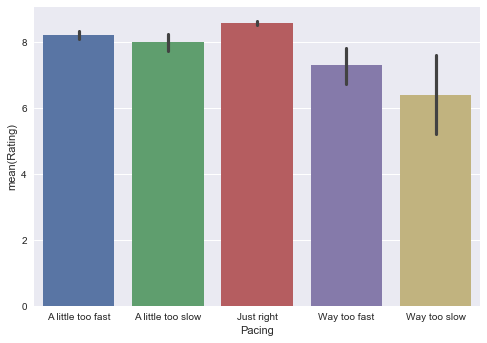

In [52]:
sns.barplot(x="Pacing", y="Rating", data=df1617)
show()

In [53]:
bins = [0.0, 6.0, 8.0, 10]
labels = ['de', 'pa', 'pr']

In [54]:
types = pd.cut(df1617["Rating"], bins, include_lowest=True, labels=labels)

In [55]:
df1617 = df1617.assign(Promoter = types)

In [56]:
promotersrs = df1617.groupby(['Week','Promoter']).Rating.count()

In [57]:
npssrs = promotersrs.unstack().apply(lambda x: (x[2]-x[0])/(x[0]+x[1]+x[2]) , axis=1)

/Users/fanggot/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


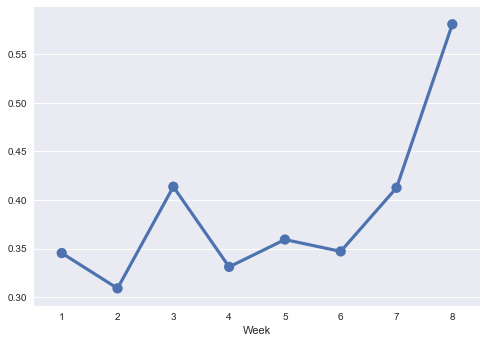

In [58]:
sns.pointplot(x=npssrs.index, y=npssrs.values)
show()

In [59]:
promotersrs

Week  Promoter
1     de           47
      pa          234
      pr          220
2     de           55
      pa          192
      pr          190
3     de           32
      pa          133
      pr          171
4     de           35
      pa          126
      pr          132
5     de           36
      pa          126
      pr          147
6     de           34
      pa          107
      pr          127
7     de           29
      pa           73
      pr          121
8     de            6
      pa           19
      pr           49
Name: Rating, dtype: int64

/Users/fanggot/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


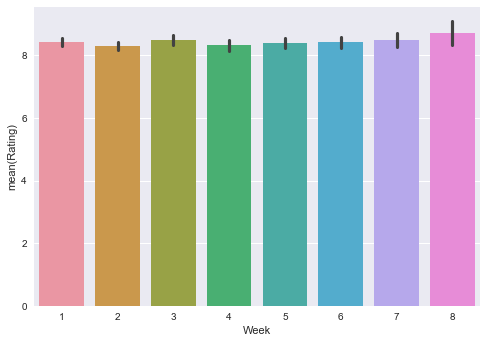

In [60]:
sns.barplot(x='Week', y='Rating', data=df1617)
show()

/Users/fanggot/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


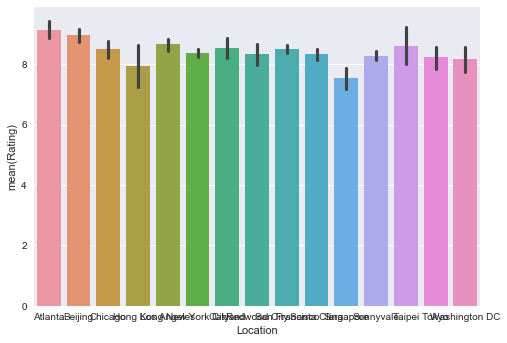

In [61]:
sns.barplot(x='Location', y='Rating', data=df1617)
show()

In [62]:
pacingnps = df1617.groupby(['Pacing','Promoter']).Rating.count().unstack().apply(lambda x: (x[2]-x[0])/(x[0]+x[1]+x[2]) , axis=1)

/Users/fanggot/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


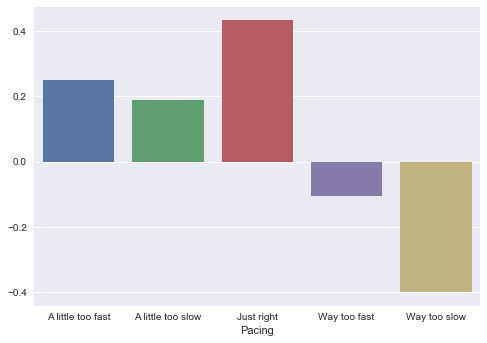

In [63]:
sns.barplot(x=pacingnps.index, y=pacingnps.values)
show()

In [64]:
tracknps = df1617.groupby(['Track','Promoter']).Rating.count().unstack().fillna(0)
tracknps = tracknps.apply(lambda x: (x[2]-x[0])/(x[0]+x[1]+x[2]) , axis=1)

In [65]:
tracknps

Track
Apps               0.344934
Apps (4-week)      0.666667
Apps, Explorer     0.299107
Games              0.458537
Games (4-week)     1.000000
Games, Explorer    0.720930
Intro              0.364929
VR                 0.516129
dtype: float64

/Users/fanggot/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


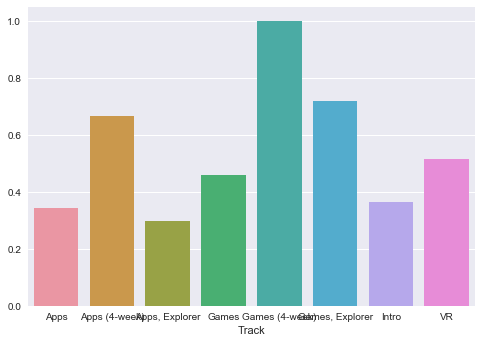

In [66]:
sns.barplot(x=tracknps.index, y=tracknps.values)
show()

In [67]:
locnps = df1617.groupby(['Location','Promoter']).Rating.count().unstack().fillna(0)
locnps = locnps.apply(lambda x: (x[2]-x[0])/(x[0]+x[1]+x[2]) , axis=1)

/Users/fanggot/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


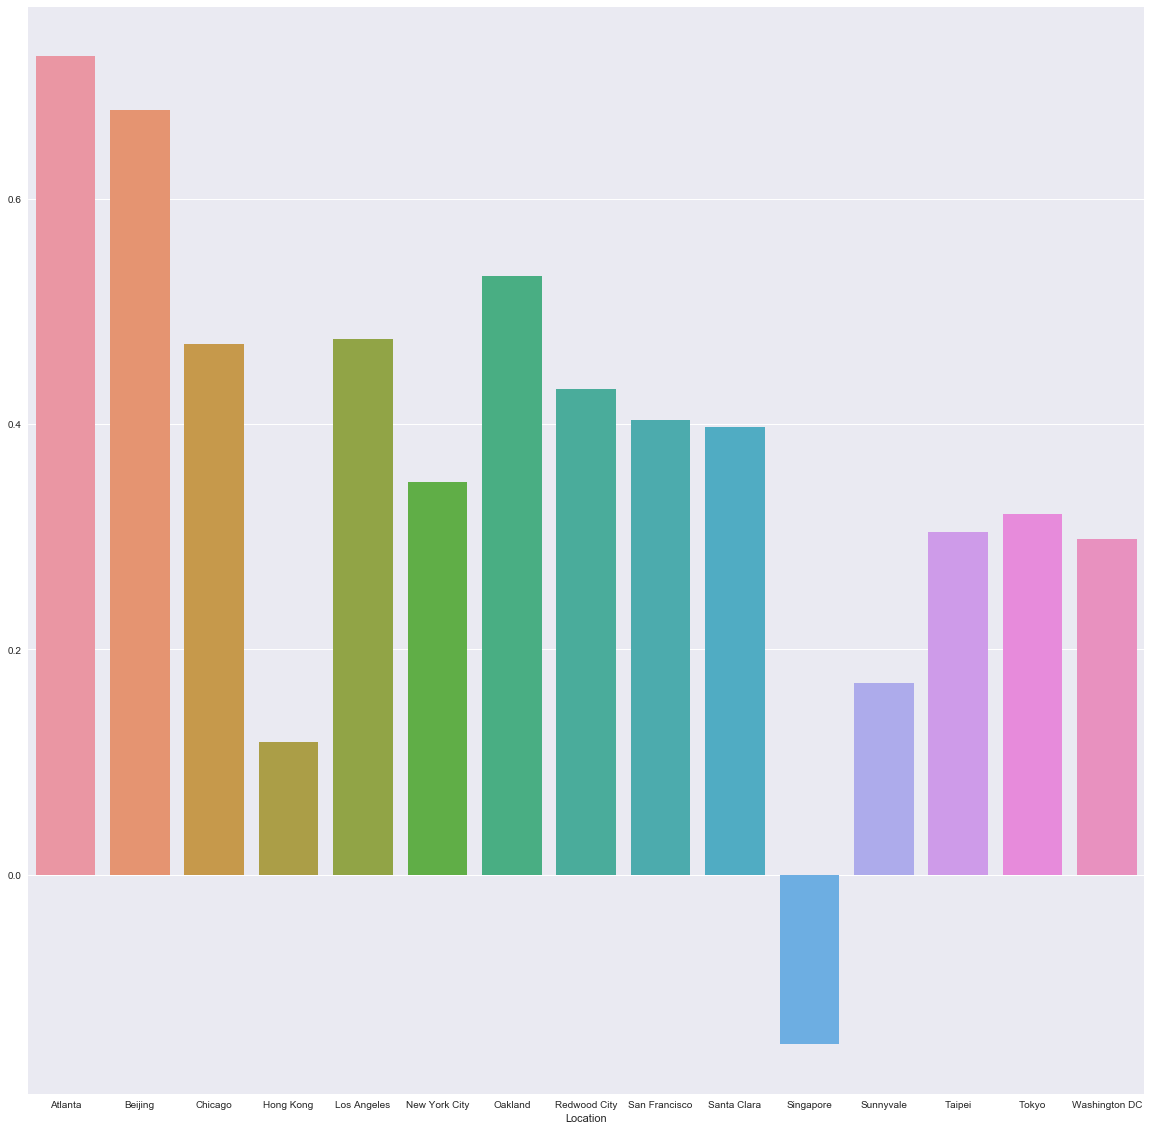

In [68]:
plt.subplots(figsize=(20, 20))
sns.barplot(x=locnps.index, y=locnps.values)
show()

In [69]:
yearnps = df1617.groupby(['Year','Promoter']).Rating.count().unstack().fillna(0)
yearnps = yearnps.apply(lambda x: (x[2]-x[0])/(x[0]+x[1]+x[2]) , axis=1)

/Users/fanggot/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


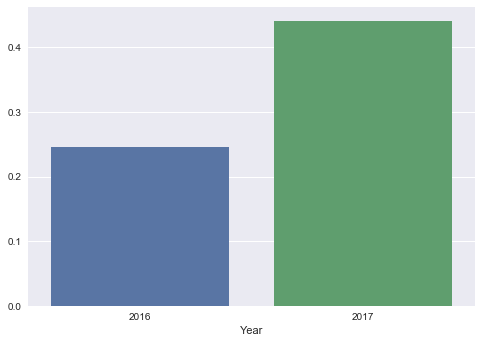

In [70]:
sns.barplot(x=yearnps.index, y=yearnps.values)
show()

/Users/fanggot/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


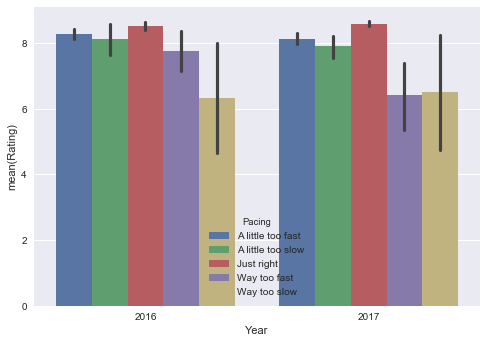

In [71]:
sns.barplot(x="Year", y="Rating", data=df1617, hue="Pacing")
show()

In [72]:
ypr = df1617.groupby(['Year','Pacing']).Rating.count().unstack().fillna(0)
print(ypr)
ypr = ypr.apply(lambda x: x/np.sum(x), axis=1)

Pacing  A little too fast  A little too slow  Just right  Way too fast  \
Year                                                                     
2016                  247                 59         571            43   
2017                  289                100        1034            23   

Pacing  Way too slow  
Year                  
2016               6  
2017               4  


In [73]:
ypr

Pacing,A little too fast,A little too slow,Just right,Way too fast,Way too slow
Year,,,,,
2016,0.266739,0.063715,0.616631,0.046436,0.006479
2017,0.199310,0.068966,0.713103,0.015862,0.002759


## size of class

In [74]:
YLW = df1617.groupby(['Year', 'Location', 'Week']).Rating.count()
YLW.unstack()

Week                   1     2     3     4     5     6     7     8
Year Location                                                     
2016 Hong Kong       NaN   NaN   NaN   NaN   3.0   3.0   NaN   NaN
     Los Angeles     7.0   7.0   6.0   8.0  12.0  10.0   9.0   3.0
     New York City  39.0  28.0  28.0  16.0  21.0  20.0  17.0  12.0
     San Francisco  93.0  62.0  23.0  31.0  42.0  25.0  19.0  29.0
     Singapore      12.0   8.0   2.0   9.0  11.0   6.0   NaN   5.0
     Sunnyvale      62.0  56.0  36.0  36.0  41.0  35.0  47.0  16.0
     Taipei          NaN   NaN   NaN   NaN   NaN  12.0  11.0   NaN
     Tokyo           NaN   NaN   NaN   NaN   NaN  13.0   NaN   NaN
2017 Atlanta         7.0   7.0   8.0   6.0   5.0   NaN   NaN   NaN
     Beijing        37.0  34.0   7.0   NaN   NaN   NaN   NaN   NaN
     Chicago        10.0   8.0  12.0   9.0  12.0  11.0   8.0   NaN
     Hong Kong       6.0   5.0   NaN   NaN   NaN   NaN   NaN   NaN
     Los Angeles    14.0  16.0  17.0  13.0  12.0  12.0  14.0   8.0
     New York City  54.0  54.0  49.0  48.0  48.0  45.0  32.0   NaN
     Oakland         6.0   4.0  10.0   8.0   9.0   5.0   5.0   NaN
     Redwood City   10.0  10.0  10.0  10.0  10.0   7.0   1.0   NaN
     San Francisco  63.0  53.0  71.0  59.0  48.0  31.0  34.0   1.0
     Santa Clara    29.0  29.0  33.0  31.0  28.0  27.0  24.0   NaN
     Tokyo          27.0  28.0  10.0   NaN   NaN   NaN   NaN   NaN
     Washington DC  13.0  13.0   6.0   5.0   4.0   5.0   1.0   NaN

In [75]:
locnps

Location
Atlanta          0.727273
Beijing          0.679487
Chicago          0.471429
Hong Kong        0.117647
Los Angeles      0.476190
New York City    0.348337
Oakland          0.531915
Redwood City     0.431034
San Francisco    0.403509
Santa Clara      0.398010
Singapore       -0.150943
Sunnyvale        0.170213
Taipei           0.304348
Tokyo            0.320513
Washington DC    0.297872
dtype: float64